In [1]:
from transformers import AutoModelForCausalLM
import torch
from matplotlib import pyplot as plt

model_name = "meta-llama/Llama-2-7b-hf"
model = AutoModelForCausalLM.from_pretrained(model_name)

W_k_list = []
W_v_list = []

for i, layer in enumerate(model.model.layers):
    attn = layer.self_attn

    W_k = attn.k_proj.weight.detach().cpu()  # shape: [hidden_size, hidden_size] [num_head*head_dim, in_feature]
    W_v = attn.v_proj.weight.detach().cpu()

    W_k_list.append(W_k)
    W_v_list.append(W_v)

/home/azzhang/miniforge3/envs/fms-mo/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/azzhang/miniforge3/envs/fms-mo/lib/python3.10/site-packages/transformers/utils/hub.py:105: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 2/2 [00:02<00:00,  1.08s/it]


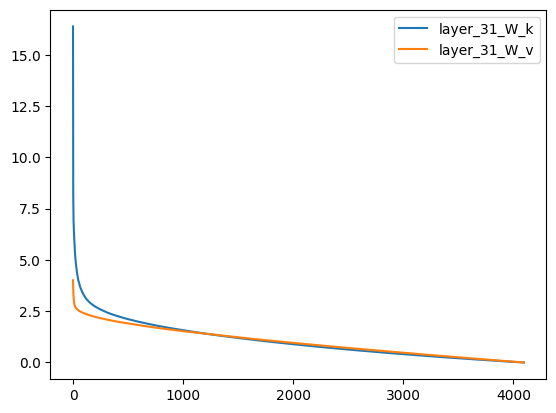

In [22]:
# for i, wk in enumerate(W_k_list):
target_layer = 31
wk = W_k_list[target_layer]
wv = W_v_list[target_layer]
plt.figure()
_, s_k, _ = torch.linalg.svd(wk.float())
_, s_v, _ = torch.linalg.svd(wv.float())
plt.plot(s_k.detach().cpu().numpy(), label=f'layer_{target_layer}_W_k')
plt.plot(s_v.detach().cpu().numpy(), label=f'layer_{target_layer}_W_v')


plt.legend()
plt.show()